In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from numpy import linalg as LA


%matplotlib inline

In [2]:
signs = np.loadtxt('sign_mnist_train.csv', delimiter=",", dtype=str)

# Clean data

# Remove the columns on index (row) 0
signs = signs[1:,:]
# Remove the last column ('label')
signs = signs[:,1:]
# change the dtype to 'float64'
signs = signs.astype('float64')

In [3]:
# (REMOVE LATER) Use a small subset of data for code experimentation
# signs = signs[:500,:]

In [4]:
# viewcolumn(columnvector);
# VIEWCOLUMN Displays a 28 x 28 grayscale image stored in a column vector.
# Tim Marks 2002
def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([28, 28], order='F').T, cmap=plt.get_cmap('gray'))

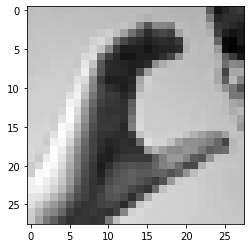

In [5]:
# Example Image
viewcolumn(signs[2])

In [6]:
def calcSqDistances(X, Kmus):
    #zero filled N x K matrix to fill with squared vectors
  N,P = X.shape

  K,P = Kmus.shape

  sqDmat = np.zeros((N,K))

  for n, n_row in enumerate(X):
    for k, k_row in enumerate(Kmus):
      sqDist = k_row - n_row
      sqDist = sqDist.dot(sqDist)
      sqDmat[n][k] = sqDist

  return sqDmat

In [7]:
def determineRnk(sqDmat):
  N,K = sqDmat.shape
  Rnk = np.zeros((N,K))

  for n, N_row in enumerate(sqDmat):
    closest = 0
    for k in range(K):
      if N_row[k] < N_row[closest]:
        closest = k
    Rnk[n][closest] = 1
  return Rnk

In [8]:
def recalcMus(X, Rnk):
  N, P = X.shape
  N, K = Rnk.shape
  Kmus = np.zeros((K,P))

  for k in range(K):
    k_sum = np.zeros((1,P))
    count = 0
    for n, n_row in enumerate(Rnk):
      if n_row[k] == 1:
        k_sum = k_sum + X[n]
        count += 1
    k_mean = [x / count for x in k_sum]
    Kmus[k] = np.asarray(k_mean)

  return Kmus

In [9]:
def runKMeans(K):
  #determine and store data set information
  N, D = data.shape

  #allocate space for the K mu vectors
  Kmus = np.zeros((K, D))

  #initialize cluster centers by randomly picking points from the data
  rand_inds = np.random.permutation(N)
  Kmus = data[rand_inds[0:K],:]

  #specify the maximum number of iterations to allow
  maxiters = 1000

  for iter in range(maxiters):
    sqDmat = calcSqDistances(data, Kmus)
    Rnk = determineRnk(sqDmat)
    KmusOld = Kmus

    #recalculate mu values based on cluster assignments as per Bishop (9.4)
    Kmus = recalcMus(data, Rnk)
    #check to see if the cluster centers have converged. If so, break.
    if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
      print(iter)
      break

  return Kmus

In [10]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [11]:
# normc(M) normalizes the columns of M to a length of 1.
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [12]:
# Transpose data so that columns are data points
signsT = signs.T
signsT.shape

(784, 27455)

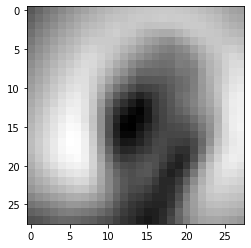

In [13]:
#Compute the mean Sign, and create variable for use in repmat
meanSign = np.mean(signsT, axis = 1)
meanSignRep = meanSign[:, np.newaxis]
viewcolumn(meanSign)

In [14]:
#Subtract the mean from all of the data
# call the matrix of mean-subtracted data A
A = signsT - repmat(meanSignRep, 1, signs.shape[0])

In [15]:
# compute the eigenvectors and eigenvalues of A⊤A.
[Dp,Vp] = LA.eig(A.dot(A.T))

In [16]:
#sort the eigenvectors and eigenvalues in order of largest to smallest
#Call the matrix of sorted eigenvectors V .
[V,D] = eigsort(Vp,Dp)

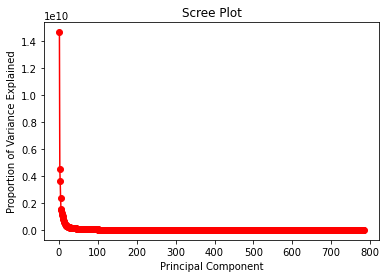

In [53]:
y = D.diagonal()
x = range (1, 785)
plt.plot(x, y, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

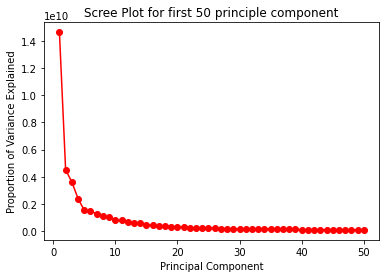

In [56]:
y50 = y[:50]
x50 = range (1, 51)
plt.plot(x50, y50, 'ro-')
plt.title('Scree Plot for first 50 principle component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

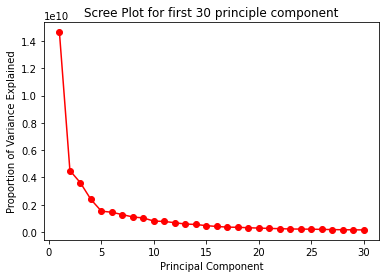

In [57]:
y30 = y[:30]
x30 = range (1, 31)
plt.plot(x30, y30, 'ro-')
plt.title('Scree Plot for first 30 principle component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [17]:
#We don't use the ATA trick, we directly computer AAT to compute eigenSigns
U = V

In [18]:
U.shape

(784, 784)

In [19]:
#Use normc that we provide to normalize the columns of U so they all have length 1
#Assign the output of normc to U.
U  = normc(U)

In [20]:
#Find the principal component coordinates of the 5th index 4 face image in the data set
c = U.T @ (A[:,4])
c.shape

(784,)

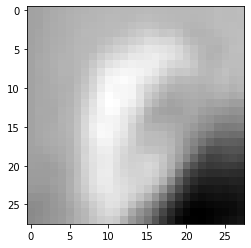

In [21]:
viewcolumn(U[:,1])

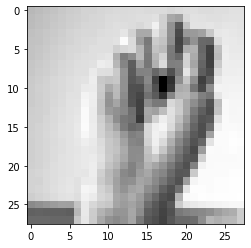

In [22]:
#Reconstruct the 5th face using all the principal components.
recon = U.dot(c) + meanSign
viewcolumn(recon)

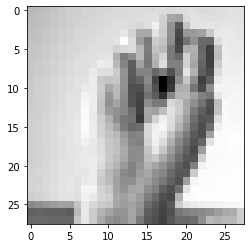

In [23]:
viewcolumn(signsT[:,4]) #original

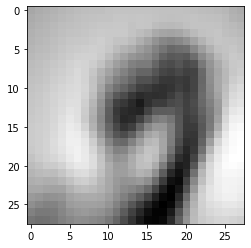

In [24]:
#Reconstruct the 5th face using only the first 10 principal components
recon_lossy = U[:,:10].dot(c[:10]) + meanSign
viewcolumn(recon_lossy)

In [25]:
# calculate matrix of PCA coordinate space with M = 784 dimensions
M = 784
C = U.T[:M] @ A
# calculate transpose of coordinate space data
CT = C.T

In [26]:
#Set up the data to be ready to run in K-Means
data = CT

In [27]:
#Run KMeans at 24 clusters at M = 784 dimensions
Kmus_24 = runKMeans(24)

120


In [28]:
#Transform PCA coordinate clusters to sign space 
Groups = U[:,:M] @ Kmus_24.T
Groups = Groups.T

In [29]:
Groups.shape

(24, 784)

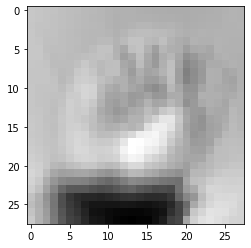

In [30]:
viewcolumn(Groups[9])

In [31]:
# gets a plot of what different clusters represent
# and takes as input the clustere location matrix
def get_cluster_plot(Kmus, subplots): 
    fig,axs = plt.subplots(subplots,5, figsize = (20,15), constrained_layout=True)
    
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(28,-1) * 255
        axs[i//5][i%5].imshow(cluster, cmap = plt.cm.binary)
        axs[i//5][i%5].set_title(f'Cluster {i + 1}')

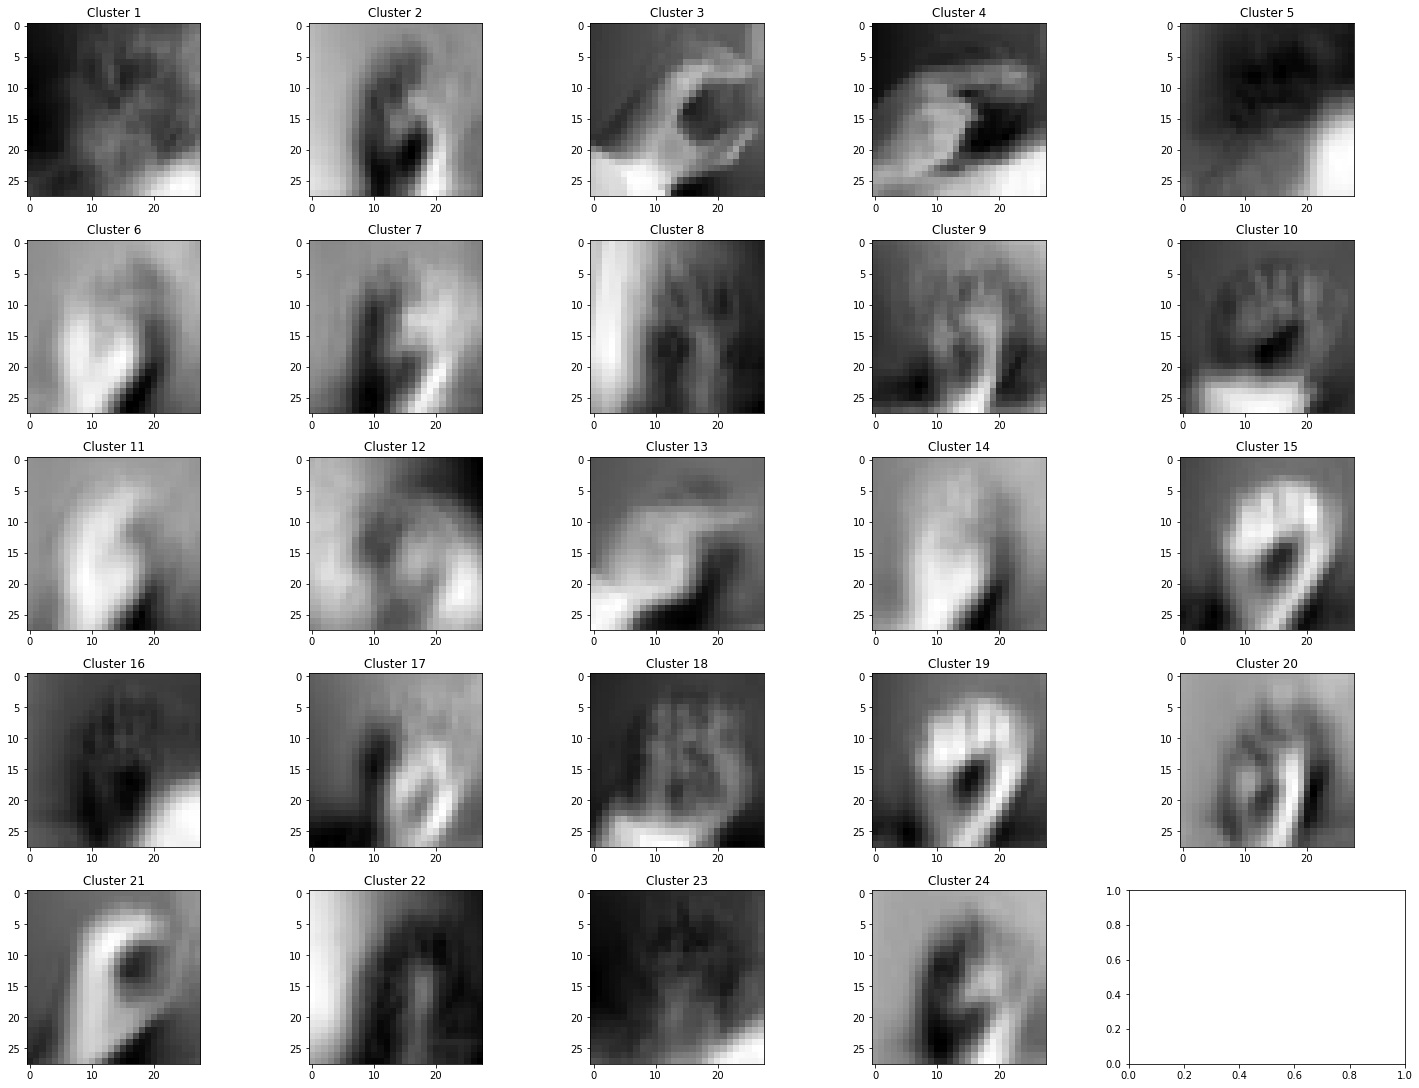

In [32]:
get_cluster_plot(Groups, 5)

In [33]:
# calculate matrix of PCA coordinate space with M = 300 dimensions
M = 300
C = U.T[:M] @ A
# calculate transpose of coordinate space data
CT = C.T

In [34]:
#Set up the data to be ready to run in K-Means
data = CT

In [35]:
#Run KMeans at 24 clusters at M = 300 dimensions
Kmus_24_M300 = runKMeans(24)

54


In [36]:
#Transform PCA coordinate clusters to sign space 
Groups_M300 = U[:,:M] @ Kmus_24_M300.T
Groups_M300 = Groups_M300.T

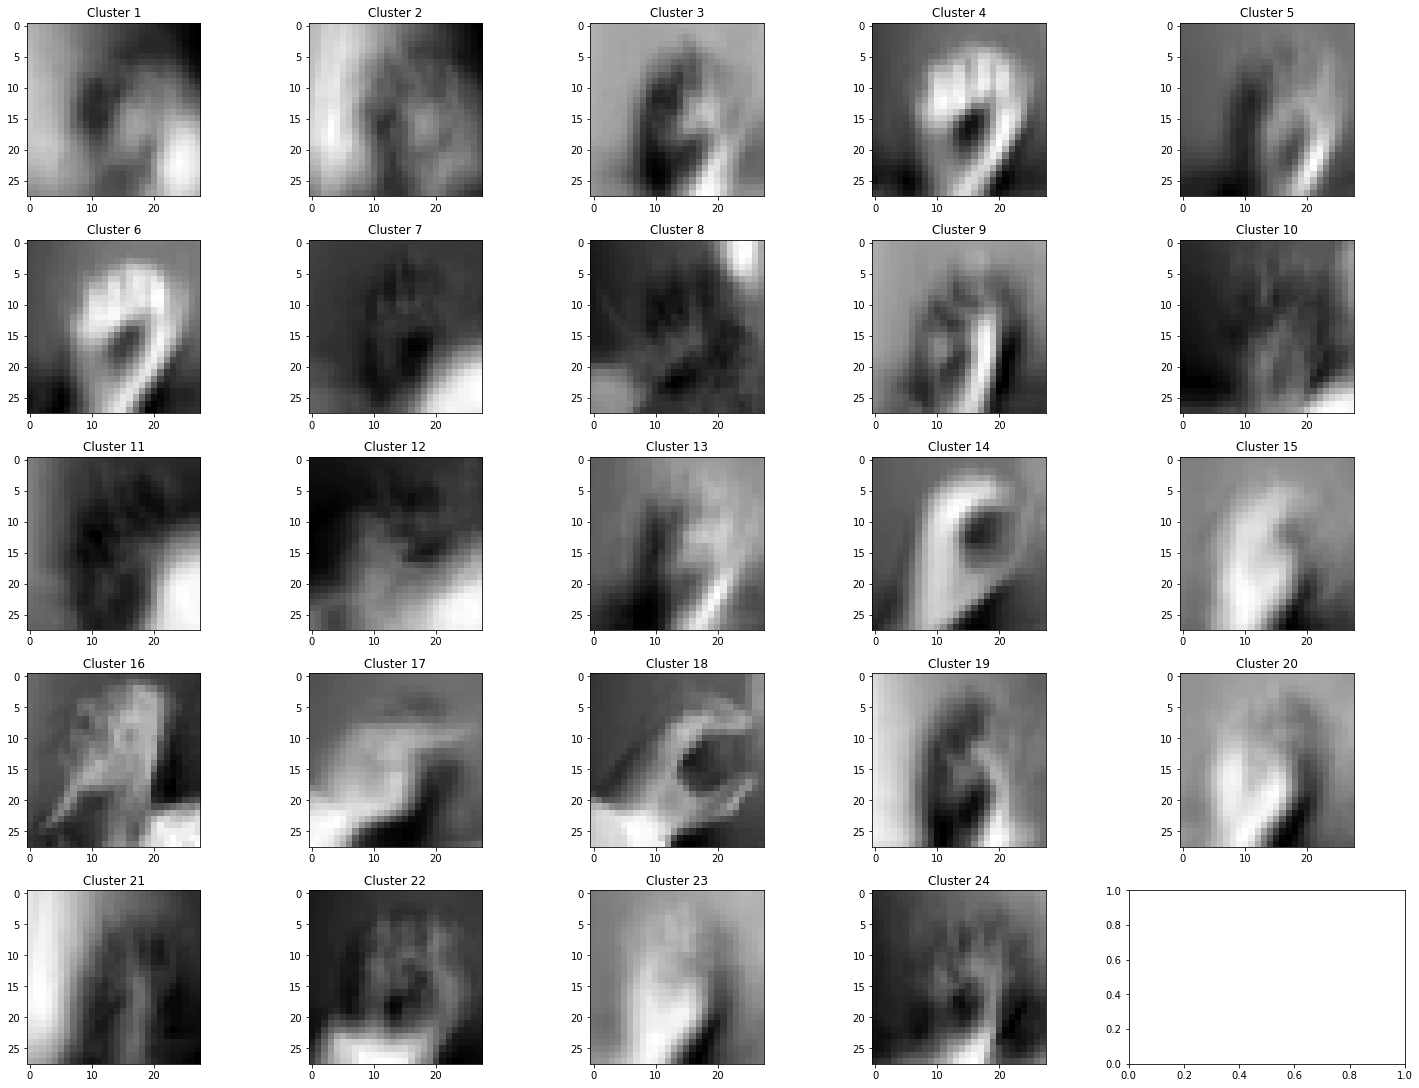

In [37]:
get_cluster_plot(Groups_M300, 5)

In [38]:
# calculate matrix of PCA coordinate space with M = 50 dimensions
M = 50
C = U.T[:M] @ A
# calculate transpose of coordinate space data
CT = C.T

In [39]:
#Set up the data to be ready to run in K-Means
data = CT

In [40]:
#Run KMeans at 24 clusters at M = 50 dimensions
Kmus_24_M50 = runKMeans(24)

131


In [42]:
#Transform PCA coordinate clusters to sign space 
Groups_M50 = U[:,:M] @ Kmus_24_M50.T
Groups_M50 = Groups_M50.T

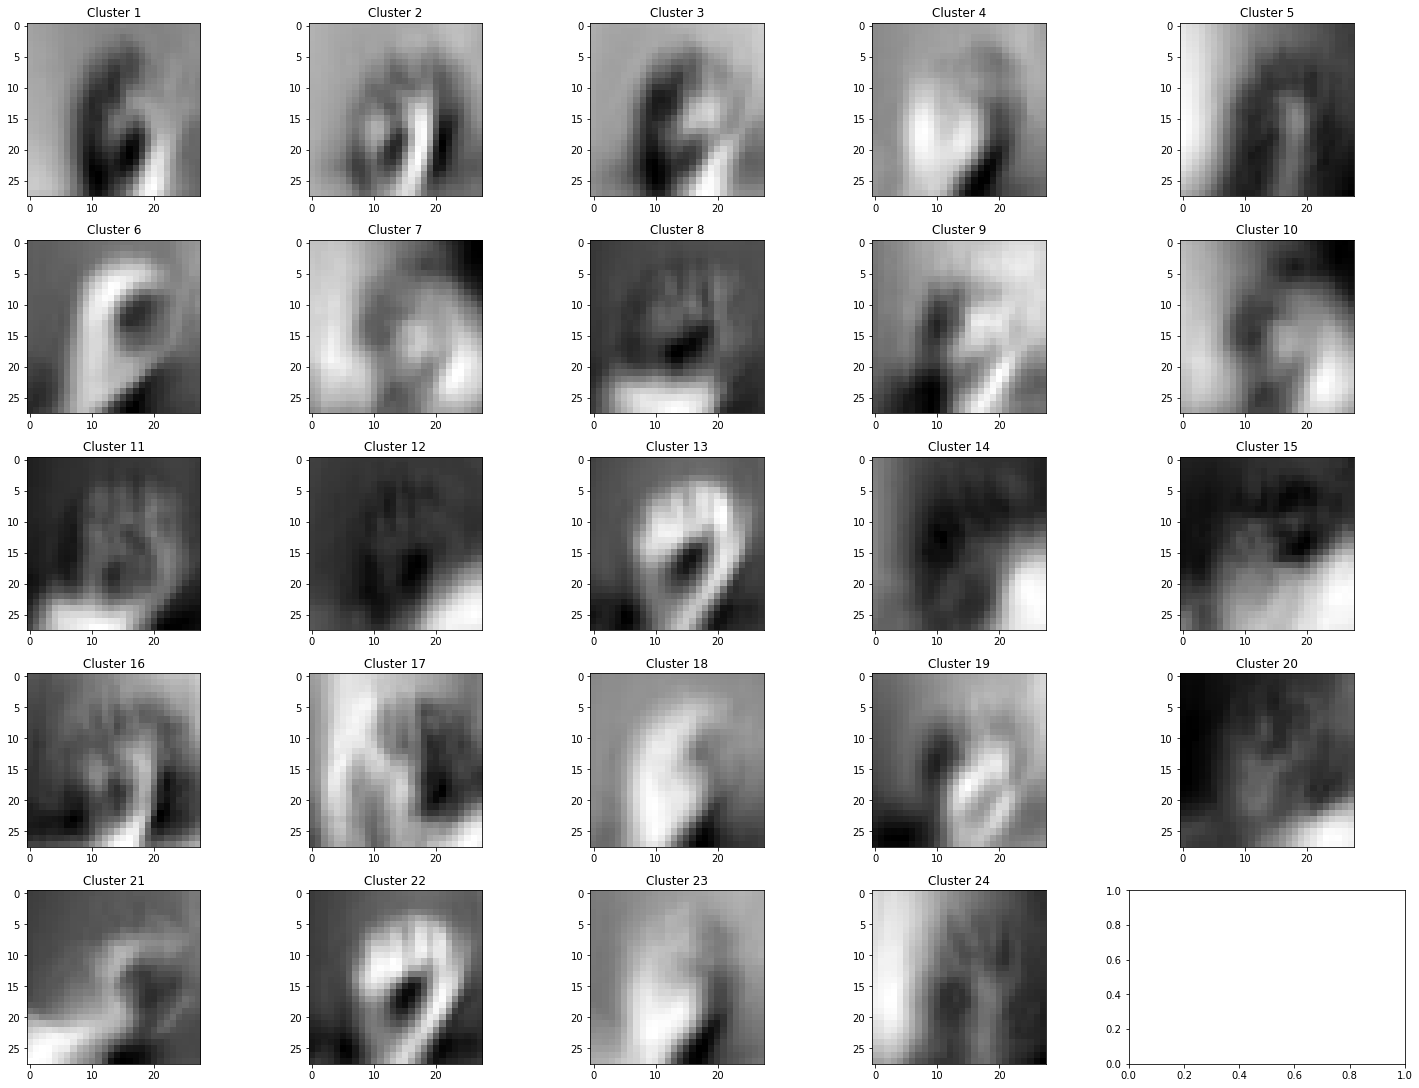

In [43]:
get_cluster_plot(Groups_M50, 5)

In [44]:
# calculate matrix of PCA coordinate space with M = 10 dimensions
M = 10
C = U.T[:M] @ A
# calculate transpose of coordinate space data
CT = C.T

In [45]:
#Set up the data to be ready to run in K-Means
data = CT

In [46]:
#Run KMeans at 24 clusters at M = 10 dimensions
Kmus_24_M10 = runKMeans(24)

51


In [48]:
#Transform PCA coordinate clusters to sign space 
Groups_M10 = U[:,:M] @ Kmus_24_M10.T
Groups_M10 = Groups_M10.T

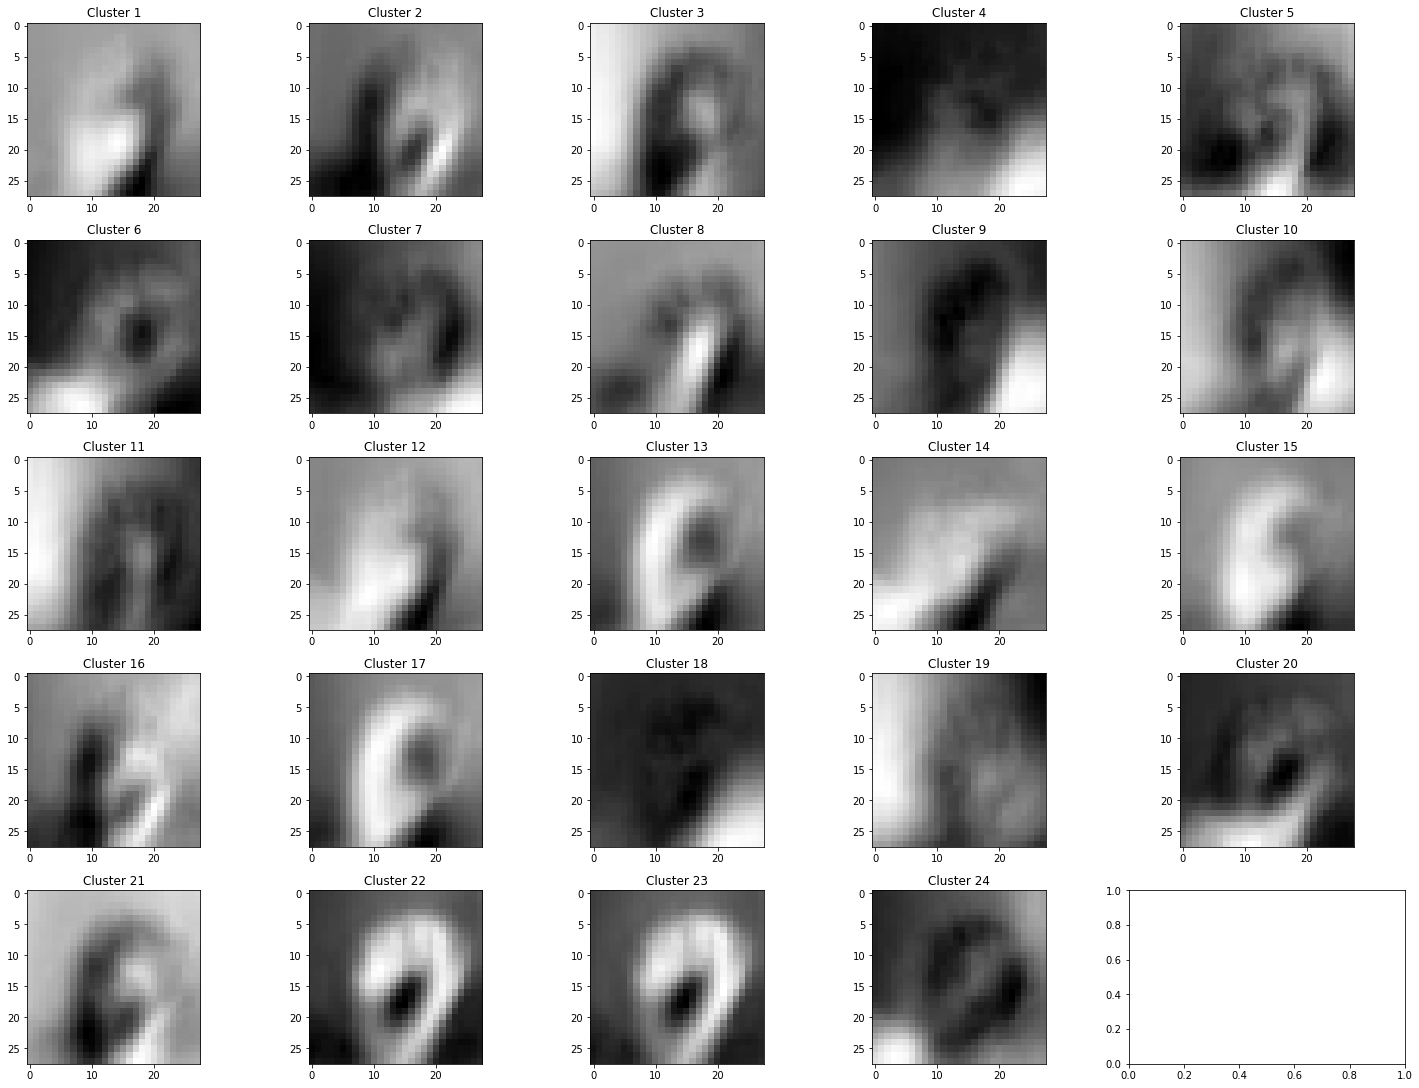

In [49]:
get_cluster_plot(Groups_M10, 5)

In [58]:
#Set up the data to be ready to run in K-Means
#Run KMeans at 24 clusters at M = 784 dimensions
#Not being run by initially by PCA
data = signs
Kmus_24_orig = runKMeans(24)

118


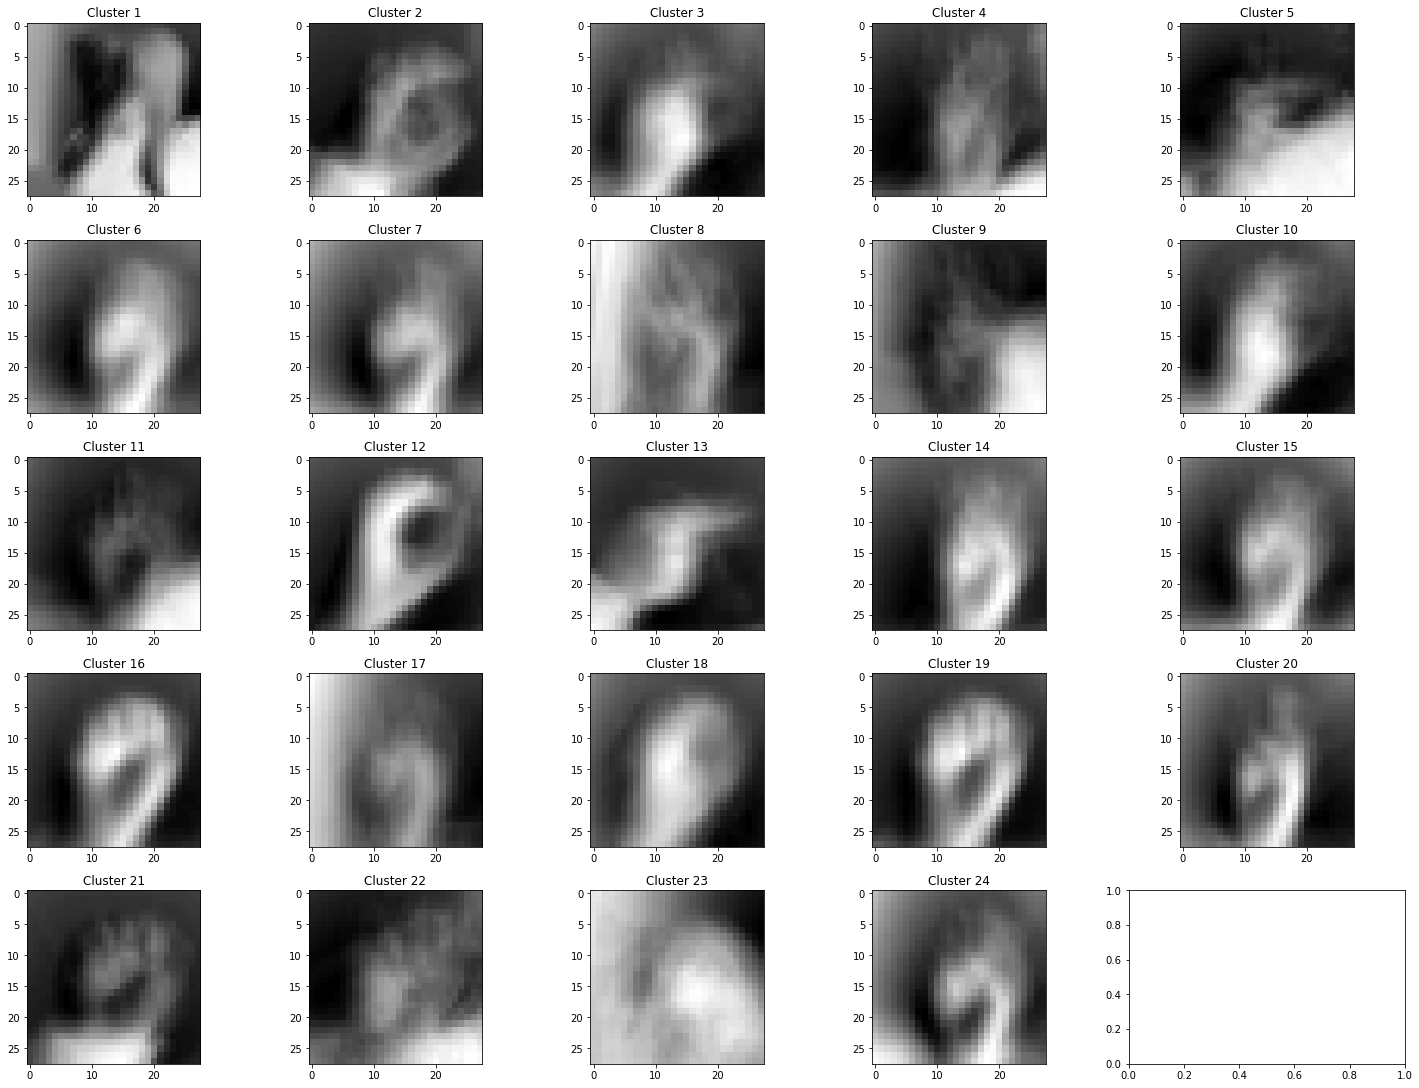

In [59]:
get_cluster_plot(Kmus_24_orig,5)

In [60]:
#Run KMeans at 50 clusters at M = 50 dimensions
Kmus_50_orig = runKMeans(50)

63


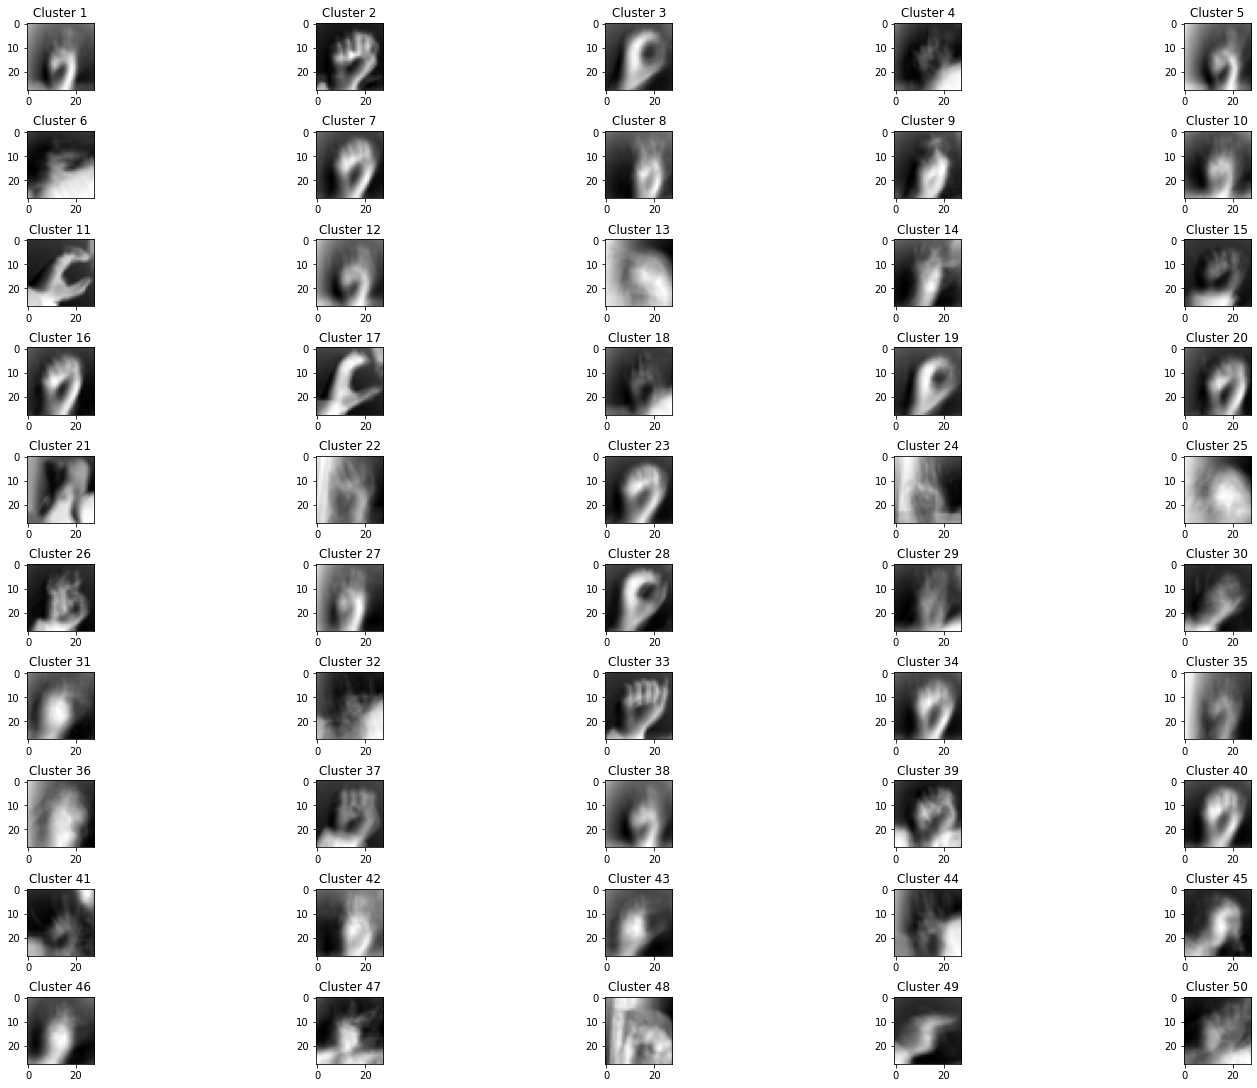

In [61]:
get_cluster_plot(Kmus_50_orig,10)

In [65]:
# gets a plot of what different clusters represent
# and takes as input the clustere location matrix
def get_cluster_plot50(Kmus, subplots): 
    fig,axs = plt.subplots(subplots,10, figsize = (20,15), constrained_layout=True)
    
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(28,-1) * 255
        axs[i//10][i%10].imshow(cluster, cmap = plt.cm.binary)
        axs[i//10][i%10].set_title(f'Cluster {i + 1}')

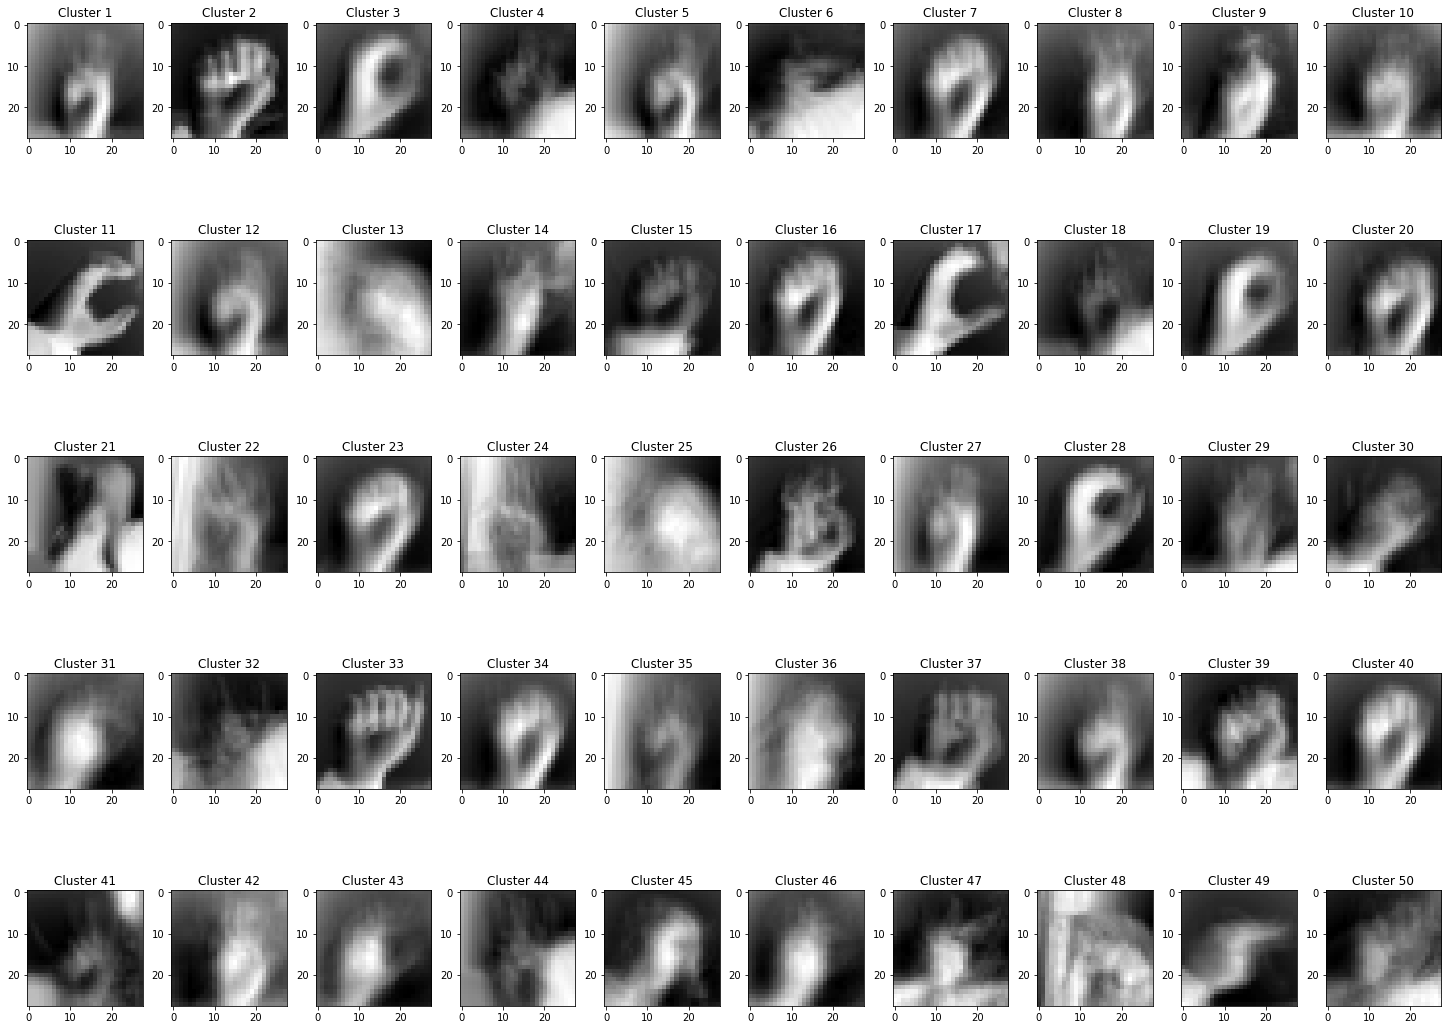

In [67]:
get_cluster_plot50(Kmus_50_orig,5)